# **CONTEXTUALIZAÇÃO E MOTIVAÇÃO**
## **ANALISE DE DEMANDA PARA POSTO DE GASOLINA**

Em um posto de gasolina, na região de Águas Claras, Brasília (DF) o número de carros que chegam para abastecimento  é na ordem de 12 veículos por hora. Sabendo que sua estrutura do posto é de 7 (sete) bombas para combustíveis (gasolina, álcool ou diesel) e 1(uma) eletro-bomba para carros elétricos.

O tempo de atendimento mínimo de atendimento para combustíveis líquidos é de 3 minutos com tempo médio de 5 minutos. Para carros elétricos, o tempo mínimo de atendimento é de 15 minutos e tempo médio de 20 minutos.

Sabe-se também que se o preço de qualquer combustível cair 20%, o movimento aumenta para 18 veículos por hora.

O horário do posto é das 6h às 22h. O dono do posto pensa em expandir o atendimento para suprir a demanda potencial de mais duas novas concessionárias na região, o que irá aumentar o fluxo para 20 veículos por hora.

Analise o cenário e indique se o posto deve ou não expandir o atendimento para atender a nova demanda sem filas.


*1.000 carros por dia sem formar filas, aumentando o número de bombas ou ampliando o horário de atendimento para 24h*

---
# **FUNDAMENTAÇÃO TEÓRICA**
### **ENTENDENDO O CENÁRIO - CHEGADA DE CARROS PARA ATENDIMENTO**

A quantidade de carros que chegam para abastecimento é um evento observável cuja distribuição se aproxima da distribuição discreta de *Poisson*.

A distribuição de Poisson é da classe de distribuições discretas, com elementos do espaço amostral contáveis. É amplamente utilizada quando queremos contar uma determinada quantidade de eventos em um intervalo de tempo.

No nosso cenário, a variável aleatória $(X)$ é o número de carros que chegam por hora no posto de combustível para atendimento.

Por definição, uma variável aleatória é definida como sendo de Poisson se a Função Massa de Probabilidade (FMP) é definida por:


$$P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} ; k={0,1,2,3,...}$$

Indicamos a variável aleatória de Poisson por:

$$X \sim Poisson(\lambda)$$

onde: $\lambda$ é o número médio de eventos no intervalo considerado; $\lambda > 0$

A distribuição de Poisson é uma aproximação da distribuição discreta binomial $b(k;n,p)$ quando $n$ for grande e $p$ pequeno de forma que:
$$ λ = np $$



---
# **METODOLOGIA E RESULTADOS**
# CENÁRIO ATUAL

Considerando o cenário atual do posto de combustível como uma distribuição de *Poisson*:

$$X \sim Poisson(12)$$

onde:

$X: $ é o número de carros atendidos por hora em um cenário atual;

$λ: 12$ veículos por hora


Assim, podemos representar graficamente a Função Massa de Probabilidade (FMP) para o cenário atual do posto de combustível.

**CARREGANDO AS BIBLIOTECAS INICIAIS**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import expon
import math

**Calculando a probabilidade de atendimento para um deternimado número de veículos considerando as condições atuais do posto de combustível**


In [14]:
# Definindo o parâmetro lâmbda
lam = 12  # taxa média de chegadas

# Calcula Poisson (FMP) para k=10
pois_pmf = poisson.pmf(k=10, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender 10 carros por hora é de ', pois_pmf)


A probabilidade teórica de atender 10 carros por hora é de  0.10483725588365922


**CENÁRIO ATUAL DO POSTO DE COMBUSTÍVEL DURANTE O ANO**

Considerando que o cenário atual aconteça durante o ano todo, vamos simular a probabilidade deste cenário com base nos dados observados.


A probabilidade simulada de atender 10 carros por hora é de  0.09988584474885845


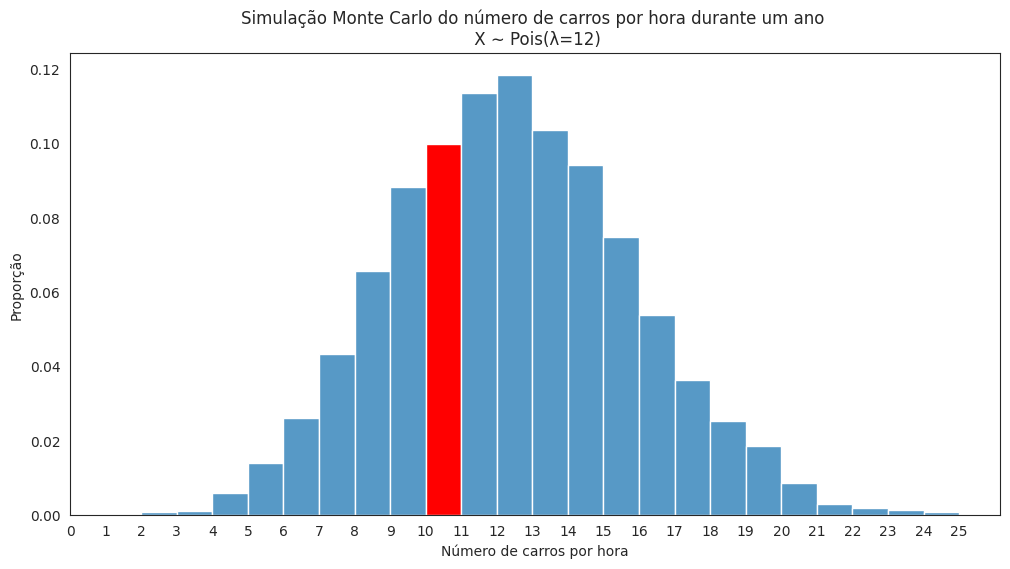

In [15]:
# Definindo uma semente aleatória
np.random.seed(492025)

# Simula teoricamente a distribuição de Poisson do cenário atual de veículos por hora durante o ano
cars = pd.DataFrame({'data': np.random.poisson(lam=12, size=8760)})

# Define o tamanho do gráfico
plt.figure(figsize=(12,6))

# Cria histograma com ggplot
ax = sns.histplot(data=cars, x='data', binwidth=1, stat='probability')

plt.xticks(range(26))
plt.xlabel('Número de carros por hora')
plt.ylabel('Proporção')
plt.title('Simulação Monte Carlo do número de carros por hora durante um ano \n X ∼ Pois(λ=12)')

# Destaca o histograma nas linhas verticais em x=10 e x=11
ax.patches[8].set_facecolor('red')
valor_p_10 = ax.patches[8].get_height()

print("A probabilidade simulada de atender 10 carros por hora é de ", valor_p_10);

sns.set_style('white')
plt.show()

**Calculando a probabilidade teórica acumulada de ocorrência para o cenário atual do posto de combustível**


In [16]:
# Definindo o parâmetro lâmbda
lam = 12

# Calcula Poisson (FDA) para k=10
pois_cdf = poisson.cdf(k=10, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender até 10 carros por hora é de ', pois_cdf)

# Para conhecer a probabilidade de atender mais de 10 carros por hora basta calcular o complementar
pois_compl_cdf = 1 - poisson.cdf(k=10, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender mais de 10 carros por hora é de ', pois_compl_cdf)



A probabilidade teórica de atender até 10 carros por hora é de  0.3472294175541719
A probabilidade teórica de atender mais de 10 carros por hora é de  0.6527705824458281


Considerando que o cenário atual aconteça durante o ano todo, vamos calcular a probabilidade **acumulada** (teórica e empírica) de movimento do posto com base nos parâmetros observados.

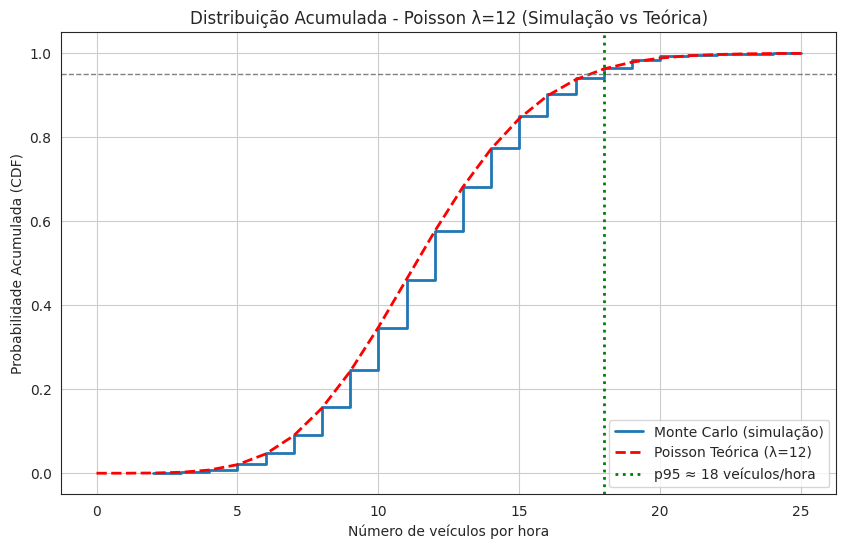

In [17]:
# Definindo uma semente aleatória
np.random.seed(492025)

# Define os parâmetros para a simulação e distribuição acumulada teórica
lam = 12
horas = 8760

# Simulação Monte Carlo (Simula teoricamente a distribuição de Poisson do cenário atual de veículos por hora durante o ano (8.760 horas = 24h * 365 dias))
sim_data = np.random.poisson(lam, size=horas)

# Distribuiçao Acumulada EMPÍRICA (Monte Carlo)
valores, contagens = np.unique(sim_data, return_counts=True)
cdf_empirica = np.cumsum(contagens) / horas

# Distribuição Acumulada TEÓRICA
x = np.arange(0, max(valores)+1)
cdf_teorica = poisson.cdf(x, mu=lam)

# Calcula o quantil 95% teórico
q95 = poisson.ppf(0.95, mu=lam)

# plotar
plt.figure(figsize=(10,6))
plt.step(valores, cdf_empirica, where="post", label="Monte Carlo (simulação)", linewidth=2)
plt.plot(x, cdf_teorica, "r--", label="Poisson Teórica (λ=12)", linewidth=2)

# marcar o ponto p95
plt.axvline(q95, color="g", linestyle=":", linewidth=2, label=f"p95 ≈ {int(q95)} veículos/hora")
plt.axhline(0.95, color="gray", linestyle="--", linewidth=1)

plt.xlabel("Número de veículos por hora")
plt.ylabel("Probabilidade Acumulada (CDF)")
plt.title("Distribuição Acumulada - Poisson λ=12 (Simulação vs Teórica)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Para conhecer a probabilidade de atender até 18 carros por hora
pois_compl_cdf = poisson.cdf(k=18, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender até 18 carros por hora é de ', pois_compl_cdf)

# Para conhecer a probabilidade de atender mais de 18 carros por hora
pois_compl_cdf = 1 - poisson.cdf(k=18, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender mais de 18 carros por hora é de ', pois_compl_cdf)

A probabilidade teórica de atender até 18 carros por hora é de  0.962583510336608
A probabilidade teórica de atender mais de 18 carros por hora é de  0.03741648966339195


Pela distribuição de probabilidade teórica, a probabilidade de atender mais de 18 carros por hora é de:

$$ P(X > 18) = 1 - P(X <= 18) ≅ 1 - 0.96258 ≅ 0,03742 \approx 3,74\%$$

---
# **FUNDAMENTAÇÃO TEÓRICA**
### **ENTENDENDO O CENÁRIO - TEMPO MÉDIO DE ATENDIMENTO**

O tempo médio de atendimento tembém é um evento observável cuja distribuição se aproxima da distribuição contínua *Exponencial*.

A distribuição Exponencial é da classe de distribuições contínuas, cujos elementos da álgebra de eventos são contínuos. É amplamente utilizado quando queremos estimar o tempo de espera até um determinado evento ocorrer.

No nosso cenário, a variável aleatória (Y) é o tempo médio em minutos de atendimento do veículo para abastecimento.

Por definição, uma variável aleatória é definida como sendo Exponencial se a Função de Densidade de Probabilidade (FDP) é definida por:

\begin{equation}
	f(t;β)=\frac{1}{\beta}e^{-x/\beta}~;~~se~t\geq0
\end{equation}

Indicamos a variável aleatória Exponencial por:

$$Y \sim Exp(\beta)$$

onde: $\beta$ é o tempo médio de espera até um determinado evento ocorrer; $\beta > 0$



---
# **METODOLOGIA E RESULTADOS**
Considerando o tempo médio de atendimento do posto de combustível como uma distribuição *Exponencial*:

$$Y \sim Exp(5)$$

onde:

$Y: $ é o tempo médio de atendimento em minutos;

$\beta:$ média de 5 minutos para o atendimento completo


Assim, podemos representar graficamente a Função de Densidade de Probabilidade (FDP) para o tempo médio de atendimento do posto de combustível.

**Calculando a probabilidade de ocorrência para o tempo médio de atendimento do posto de combustível**


In [19]:
# Definindo o parâmetro beta
bet = 5           # tempo médio de atendimento
deslocamento = 3  # minimo de 3 minutos de atendimento

# Calcula Distribuição Exponencial (FDP) para beta=5 com t=7 e atendimento mínimo (loc) de 3 minutos
expo_pdf = expon.pdf(7, loc=deslocamento, scale=bet)

# Imprime o resultado
print('A probabilidade teórica do próximo atendendimento ser de 7 a 8 minutos é de ', expo_pdf)


A probabilidade teórica do próximo atendendimento ser de 7 a 8 minutos é de  0.08986579282344431


**TEMPO DE ATENDIMENTO NO POSTO DE COMBUSTÍVEL DURANTE O ANO**

Considerando que o tempo médio de atendimento de 5 minutos aconteça durante o ano todo, vamos simular a probabilidade do tempo médio de espera durante o ano com base nos dados observados.

A probabilidade simulada do próximo atendendimento ser de 7 a 8 minutos é de  0.08374390890701146


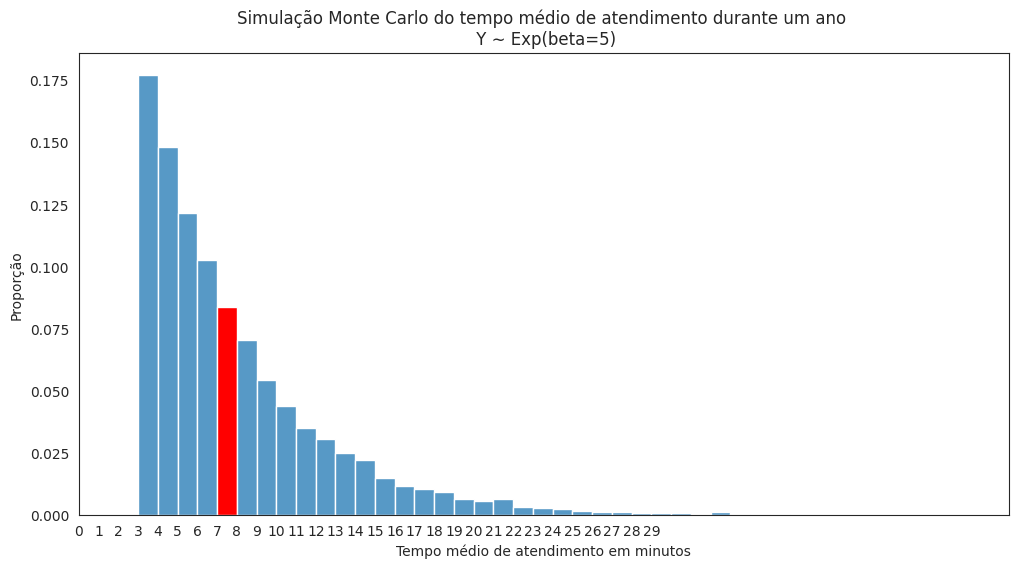

In [20]:
# Definindo uma semente aleatória
np.random.seed(492025)

# Simula teoricamente a distribuição Exponencial do tempo médio de atendimento durante o ano
tempo = pd.DataFrame({'data': (np.random.exponential(scale=bet, size=10000) + deslocamento)})

# Define o tamanho do gráfico
plt.figure(figsize=(12,6))

# Cria histograma com ggplot
ax = sns.histplot(data=tempo, x='data', binwidth=1, stat='density')

plt.xticks(range(30))
plt.xlabel('Tempo médio de atendimento em minutos')
plt.ylabel('Proporção')
plt.title('Simulação Monte Carlo do tempo médio de atendimento durante um ano \n Y ∼ Exp(beta=5)')

# Destaca o histograma nas linhas verticais em x=10 e x=11
ax.patches[4].set_facecolor('red')
valor_p_7 = ax.patches[4].get_height()

print("A probabilidade simulada do próximo atendendimento ser de 7 a 8 minutos é de ", valor_p_7);

sns.set_style('white')
plt.show()

Considerando que o tempo de atendimento médio de 5 minutos aconteça o ano todo, vamos calcular a probabilidade **acumulada** (teórica e empírica) o tempo de atendimento médio com base nos parâmetros observados.

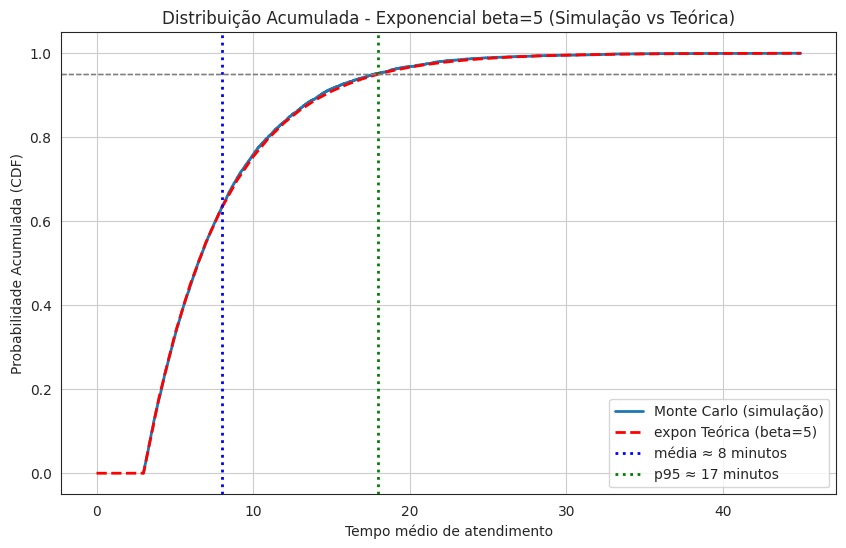

In [21]:
# Definindo uma semente aleatória
np.random.seed(492025)

# Define os parâmetros para a simulação e distribuição acumulada teórica
bet = 5           # tempo médio de atendimento
deslocamento = 3  # minimo de 3 minutos de atendimento
n = 10000         # quantidade de números aleatórios

# Simulação Monte Carlo (Simula teoricamente a distribuição Exponencial de atendimento médio durante o ano)
sim_data = np.random.exponential(scale=bet, size=n) + deslocamento

# Distribuiçao Acumulada EMPÍRICA (Monte Carlo)
valores, contagens = np.unique(sim_data, return_counts=True)
cdf_empirica = np.cumsum(contagens) / n

# Distribuição Acumulada TEÓRICA
x = np.arange(0, max(valores)+1)
cdf_teorica = expon.cdf(x, loc=deslocamento, scale=bet)

# Calcula o quantil 95% teórico
q95 = expon.ppf(0.95, loc=deslocamento, scale=bet)

# Calcula a média teórica
media = expon.mean(loc=deslocamento, scale=bet)

# plotar
plt.figure(figsize=(10,6))
plt.step(valores, cdf_empirica, where="post", label="Monte Carlo (simulação)", linewidth=2)
plt.plot(x, cdf_teorica, "r--", label="expon Teórica (beta=5)", linewidth=2)

# marcar a média
plt.axvline(media, color="b", linestyle=":", linewidth=2, label=f"média ≈ {int(media)} minutos")
plt.axhline(0.95, color="gray", linestyle="--", linewidth=1)

# marcar o ponto p95
plt.axvline(q95, color="g", linestyle=":", linewidth=2, label=f"p95 ≈ {int(q95)} minutos")
plt.axhline(0.95, color="gray", linestyle="--", linewidth=1)

plt.xlabel("Tempo médio de atendimento")
plt.ylabel("Probabilidade Acumulada (CDF)")
plt.title("Distribuição Acumulada - Exponencial beta=5 (Simulação vs Teórica)")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Para conhecer o atendimento médio considerando os parâmetros observados
expo_mean = expon.mean(loc=deslocamento, scale=bet)
expo_std = expon.std(loc=deslocamento, scale=bet)

# Imprime o resultado
print('O atendimento médio é de ', expo_mean, ' minutos. Com desvio padrão de ', expo_std, 'minutos.')

# Para conhecer a probabilidade de atendendimento médio em até 17 minutos
expo_compl_cdf = expon.cdf(x=17, loc=deslocamento, scale=bet)

# Imprime o resultado
print('A probabilidade teórica de atendendimento médio em até 17 minutos é de ', expo_compl_cdf)

# Para conhecer a probabilidade de atendendimento médio ser mais de 17 minutos por hora
expo_compl_cdf = 1 - expon.cdf(x=17, loc=deslocamento, scale=bet)

# Imprime o resultado
print('A probabilidade teórica de atendimento médio em mais de 17 minutos é de ', expo_compl_cdf)

O atendimento médio é de  8.0  minutos. Com desvio padrão de  5.0 minutos.
A probabilidade teórica de atendendimento médio em até 17 minutos é de  0.9391899373747821
A probabilidade teórica de atendimento médio em mais de 17 minutos é de  0.06081006262521793




---
# NOVA DEMANDA

O mesmo raciocínio será aplicado para a espectativa de chegada o aumento da demanda. Considerando apenas o aumento da taxa de atendimento de veículos em 20 veículos por hora.

Considerando a nova demanda esperada do posto de combustível como uma distribuição de *Poisson*:

$$X \sim Poisson(20)$$


Vamos calcular a distribuição de probabilidada acumulada da distribuição e estimar a quantidade de veículos que podem ser atendidos em até 95% das ocorrências.

Considerando após o novo cenário se estabelecer, a demanda passe a ser de 20 veículos por hora, aconteça durante o ano todo, vamos calcular a probabilidade **acumulada** (teórica e empírica) de movimento do posto com base nos novos parâmetros.

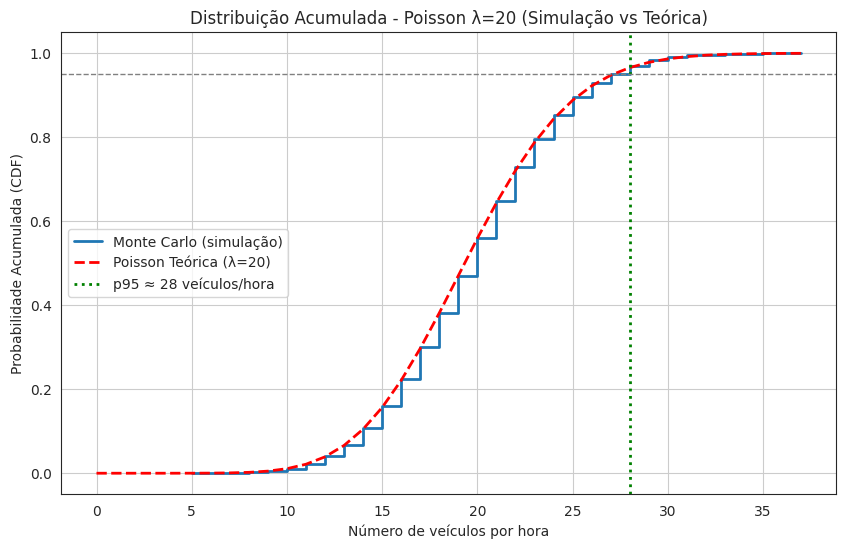

In [23]:
# Definindo uma semente aleatória
np.random.seed(492025)

# Define os parâmetros para a simulação e distribuição acumulada teórica
lam = 20
horas = 8760

# Simulação Monte Carlo (Simula teoricamente a distribuição de Poisson do novo cenário de veículos por hora durante o ano (8.760 horas = 24h * 365 dias))
sim_data = np.random.poisson(lam, size=horas)

# Distribuiçao Acumulada EMPÍRICA (Monte Carlo)
valores, contagens = np.unique(sim_data, return_counts=True)
cdf_empirica = np.cumsum(contagens) / horas

# Distribuição Acumulada TEÓRICA
x = np.arange(0, max(valores)+1)
cdf_teorica = poisson.cdf(x, mu=lam)

# Calcula o quantil 95% teórico
q95 = poisson.ppf(0.95, mu=lam)

# plotar
plt.figure(figsize=(10,6))
plt.step(valores, cdf_empirica, where="post", label="Monte Carlo (simulação)", linewidth=2)
plt.plot(x, cdf_teorica, "r--", label="Poisson Teórica (λ=20)", linewidth=2)

# marcar o ponto p95
plt.axvline(q95, color="g", linestyle=":", linewidth=2, label=f"p95 ≈ {int(q95)} veículos/hora")
plt.axhline(0.95, color="gray", linestyle="--", linewidth=1)

plt.xlabel("Número de veículos por hora")
plt.ylabel("Probabilidade Acumulada (CDF)")
plt.title("Distribuição Acumulada - Poisson λ=20 (Simulação vs Teórica)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Define os parâmetros para a simulação e distribuição acumulada teórica
lam = 20

# Para conhecer a probabilidade de atender até 28 carros por hora
pois_compl_cdf = poisson.cdf(k=28, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender até 28 carros por hora é de ', pois_compl_cdf)

# Para conhecer a probabilidade de atender mais de 28 carros por hora
pois_compl_cdf = 1 - poisson.cdf(k=28, mu=lam)

# Imprime o resultado
print('A probabilidade teórica de atender mais de 28 carros por hora é de ', pois_compl_cdf)

A probabilidade teórica de atender até 28 carros por hora é de  0.9656664781059899
A probabilidade teórica de atender mais de 28 carros por hora é de  0.034333521894010066


Pela distribuição de probabilidade teórica, a probabilidade de atender mais de 28 carros por hora é de:

$$ P(X > 28) = 1 - P(X <= 28) ≅ 1 - 0.96567 ≅ 0,03433 \approx 3,43\%$$


---

## **DISCUSSÃO**


Diante dos dados levantados vamos considerar o tempo médio de atendimento de 8 minutos, para a tomada de decisão do cenário atual e nova demanda prevista, considerando a estrutura oferecida pelo posto que está se mostrando mais do que suficiente.

Logo, considerando a estrutura do posto de combustível, com 7 bombas para atendimento e, levando em média 8 min para atendimento então, o posto tem capacidade de atender em média até 7 veículos por hora (com sobra de 4 minutos) ou 120 veículos por dia (considerando 16 horas de atendimento por dia, das 6 às 22 horas) por bomba.

No total, o posto tem capacidade de atender até 49 veículos por hora ou 840 veículos por dia (considerando as 7 bombas disponíveis).

Se, nas condições atuais, considerando um nível de serviço aceitável (SLA) de 95%, a taxa de atendimento, em 95% dos casos seria de até 18 veículos por hora assim, pode-se dizer que este posto de combustível pode atender ao cenário atual sem filas. Podendo utilizar até 3 bombas de combustível (considerando atendimento médio de 7 veículos por hora por bomba. Para 3 bombas, atendimento médio seria de 21 veículos acima dos 95% de ocorrencia esperada).

Desta forma, nas condições atuais, a capacidade do posto está ociosa em 4 bombas. Mesmo diante do risco de ter uma fila momentânea, em algum momento não esperado, vale à pena diante dos custos de se manter uma estrutura tão ociosa (mais da metade da capacidade do posto de combustível).





---



Com a nova demanda, o posto esperaria receber 20 veículos por hora. O que mudaria o comportamento da curva de probabilidade do número de veículos atendidos em 1 (uma) hora. Como analisado, nas novas condições de demanda, considerando o mesmo nível de serviço aceitável (SLA) de 95%, a taxa de atendimento, em 95% dos casos seria de até 28 veículos por hora assim, pode-se dizer que o posto de combustível continuaria a atender à nova demanda sem filas. Podendo utilizar até 4 bombas (considerando atendimento médio de 7 veículos por hora por bomba. Para 4 bombas, o atendimento seria de 28 veículos, exatamente no SLA aceitável). Neste caso, como sugestão, poderia manter mais uma bomba extra pronta para atendimento caso seja necessário considerando também a variação do tempo de atendimento de até 18 minutos em 95% dos casos. O risco de ter uma fila momentânea em algum momento não esperado, vale à pena deiante dos custos de sse manter uma estrutura ociosa.

Desta forma, nas novas condições, a capacidade do posto estaria ociosa em 2 bombas.





---


# **CONCLUSÃO**

Se a espectativa é aumentar a demanda em 20 veículos por hora com a chegada das novas concessionárias, o posto estaria pronto para atender à nova demanda sem a necessidade de alterar sua estrutura.

Enquanto o novo cenário não se estabelece, para um SLA de 95%, pode-se considerar 4 bombas ociosas. A alternativa aqui seria, manter as bombas em manutenção básica de funcionamento, remanejar os funcionários destas bombas para outros serviços do posto.

Ao menos 2 bombas indicam estar ociosas. Considerando um SLA de 95%, arriscaria um período curto do dia com poucas filas e, poderia reduzir os custos, se possível, vender os equipamentos ociosos e ampliar a oferta de serviços (por exemplo, se for viável, instalar estação de recargas do tipo 'cargas rápidas' para carros elétricos).





---


# **TRABALHOS FUTUROS**

Sugere-se como trabalho futuro, explorar outros fatores que podem estar envolvidos em um ambiente de postos de combustívies:


*   Separar as taxas de atendimentos por períodos do dia claramente diferentes: manhã, tarde e noite, por exemplo

*   Considerar a taxa de atendimento quando o posto oferece uma promoção nos preços dos combustíveis

*   Considerar separadamente a taxa de atendimento se o posto oferece também o carregamento para veículos elétricos






---

# **REFERÊNCIAS**


BIGPLOT. Calculating Exponential Distribution Probabilities with Python | Scipy. [S. l.: s. n.], 2022. 1 vídeo (3 min). Disponível em: https://www.youtube.com/watch?v=gU63I7k9Bgw. Acesso em: 6 set. 2025.

BUSSAB, Wilton de Oliveira; MORETTIN, Pedro A.; *Estatística Básica*. 5. ed. São Paulo: Saraiva, 2006.

DOWNING, Douglas; JEFFREY, Clark.; *Estatística Aplicada*. Tradução de Alfredo Alves de Farias. São Paulo: Saraiva, 1998.

GREEN, Daniel. Símbolos e Equações Matemáticas LaTeX. [S. l.: s. n.], 2024. Disponível em: https://gitmind.com/pt/faq/latex-math-symbols.html. Acesso em: 03 set. 2025.

MARINATEDPYTHON. Python - Exponential Distribution. [S. l.: s. n.], 2020. 1 vídeo (19 min). Disponível em: https://www.youtube.com/watch?v=g3viPcoykig. Acesso em: 6 set. 2025

MIT OPENCOURSEWARE. L08.6 Exponential Random Variables. [S. l.: s. n.], 2018. 1 vídeo (8 min). Disponível em: https://www.youtube.com/watch?v=FOFtMqCxZt0. Acesso em: 6 set. 2025

POLO, Felipe Maia. Original Data Science Material in Python/R. [S. l.: s. n.], 2021. Disponível em: https://github.com/felipemaiapolo/data_science_material?tab=readme-ov-file. Acesso em: 06 set. 2025.

SCIPY. SciPy documentation. [S. l.: s. n.], 2025. Disponível em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html. Acesso em: 06 set. 2025.

WIKIPEDIA. Poisson distribution. [S. l.: s. n.], 2025. Disponível em: https://en.wikipedia.org/wiki/Poisson_distribution. Acesso em: 06 set. 2025.

